In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
import itertools
import numpy as np

print("hello")

hello


Found 700 images belonging to 10 classes.
Found 700 images belonging to 10 classes.


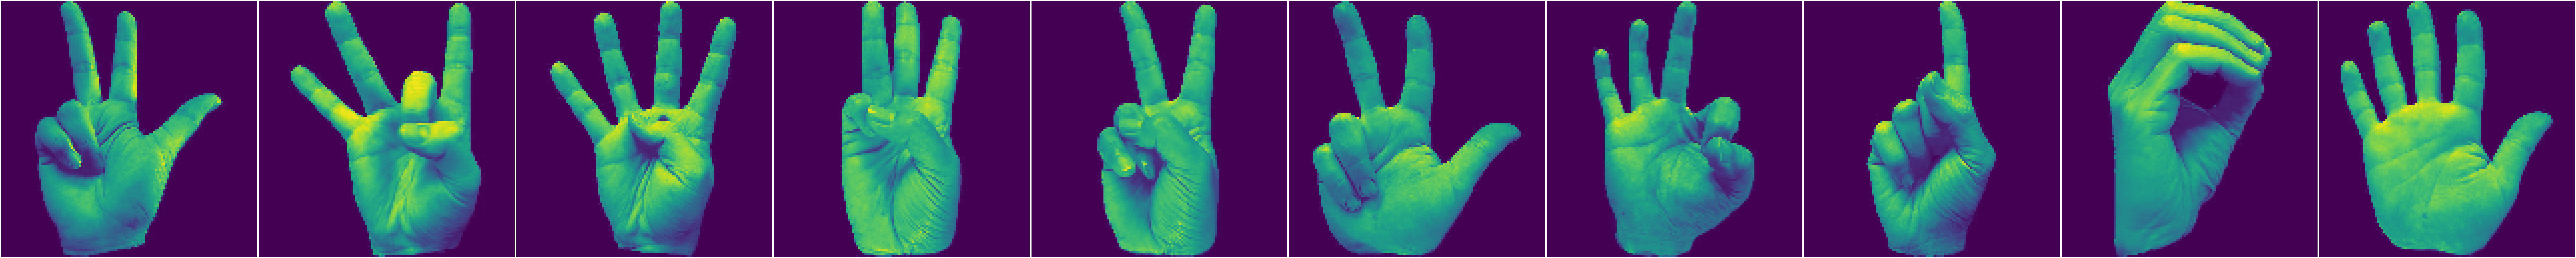

(10, 128, 128, 3)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [3]:
train = r'C:\Users\RIMSHA\ml\dataset\train'
test = r'C:\Users\RIMSHA\ml\dataset\test'

#IMAGEDATA GENERATOR WORKING: 

#USING IMAGEDATAGENERATOR TO PROCESS THE IMAGES (DATASET) AND STORE THEM AS A BATCH IN -_batch variable.

#Accepting a batch of images used for training.
#Taking this batch and applying a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.).
#Replacing the original batch with the new, randomly transformed batch.

train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train, target_size=(128,128), class_mode='categorical', batch_size=10,shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test, target_size=(128,128), class_mode='categorical', batch_size=10, shuffle=True)

#LOAD THE NEXT BATCH
images, labels = next(train_batch)

#PLOTTING THE PROCESSED IMAGES

def plotImages(data_array):
    figure, axis = plt.subplots(1, 10, figsize=(200,200))
    axes = axis.flatten()
    for image, axe in zip(data_array, axes):
        #CONVERT TO GRAYSCALE
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        axe.imshow(img)
        axe.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(images)
print(images.shape)
print(labels)



In [5]:
#SEQUENTIAL MODEL USED OF PYTHON BUILT-IN LIBRARY KERAS

#WHY?

#IT IS USED WHEN ONE INPUT HAS ONLY ONE OUTPUT

#CNN WORKING
# INPUT + FILTER = CONVOLUTIONAL LAYER
#POOLING LAYER -> COMPRESSES THE OUTPUT OF CONVOLUTIONAL LAYER
#FLATTEN -> CONVERTS THE MATRIX (MULTIDIMENSIONAL ARRAY) INTO A SINGLE ARRAY (1D)
#FULLY FUNCTIONAL NEURAL NETWORK -> HIDDEN LAYER(DENSE LAYER) + OUTPUT LAYER

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

#RELU -> LINEAR ACTIVATION FUNCTION
#SOFTMAX -> ACTIVATION FUNCTION TO GIVE AN OUTPUT BETWEEN 0 AND 1
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [7]:
#AFTER CREATING THE LAYERS, WE COMPILE THE MODEL
#IN THIS WE DEFINE FEW PARAMETERS :
  # OPTIMIZER -> IMPROVES ACCURACY BY DEFINING THE OPTIMIZATION ALGORITHIM SUCH AS SGD (STOCHASTIC GRADIENT DESCENT ALGO)
  # LOSS -> TO MEASURE THE LOSS (ERROR)
  # THE ACCURACY AND LOSS CALCULATED AFTER  EVERY EPOCH
  # IF VALIDATION LOSS NOT DESCREASING THEN LEARNING RATE IS REDUCED USING ReduceLROnPlateau.
  # IF THE VALIDATION ACCURACY KEEPS ON DECREASING THEN TRAINING IS STOPPED USING EarlyStopping
  # BOTH EARLYSTOP AND REDUCTION OF LEARNING RATE DEPENDS ON LOSS

#CALLBACKS -> performs the specified function at different stages in an epoch (start or end).
#both early stopping and reduce learning rate are classes of callbacks in keras.


model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduceLearningR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


In [8]:
#AFTER COMPILING THE MODEL, WE USE .fit() TO TRAIN THE MODEL

history = model.fit(train_batch, epochs = 10, callbacks = [reduceLearningR, earlyStop], validation_data = test_batch)

Epoch 1/10
70/70 [==============================] - 49s 654ms/step - loss: 2.4658 - accuracy: 0.4914 - val_loss: 0.6505 - val_accuracy: 0.8271
Epoch 2/10
70/70 [==============================] - 43s 621ms/step - loss: 0.3494 - accuracy: 0.9186 - val_loss: 0.1292 - val_accuracy: 0.9757
Epoch 3/10
70/70 [==============================] - 21s 298ms/step - loss: 0.1350 - accuracy: 0.9657 - val_loss: 0.0565 - val_accuracy: 0.9886
Epoch 4/10
70/70 [==============================] - 18s 257ms/step - loss: 0.0491 - accuracy: 0.9871 - val_loss: 0.0415 - val_accuracy: 0.9900
Epoch 5/10
70/70 [==============================] - 18s 261ms/step - loss: 0.0262 - accuracy: 0.9943 - val_loss: 0.0215 - val_accuracy: 0.9986
Epoch 6/10
70/70 [==============================] - 18s 260ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 18s 259ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000

In [10]:
#GET THE NEXT BATCH OF TEST IMAGES
images, labels = next(test_batch)

#EVALUATE THE TRAINED MODEL ON THE TEST DATASET
score = model.evaluate(images, labels, verbose = 0)

#PRINT THE SCORES -> LOSS AND ACCURACY
print(f'{model.metrics_names[0]} of {score[0]}; {model.metrics_names[1]} of {score[1]*100}%')
model.save('trainedModel.h5')

loss of 0.009318129159510136; accuracy of 100.0%


In [11]:
print(history.history)

{'loss': [2.465834379196167, 0.3494319021701813, 0.13496465981006622, 0.04909275472164154, 0.026177819818258286, 0.013337070122361183, 0.00797839555889368, 0.006098684389144182, 0.004889886360615492, 0.003977654967457056], 'accuracy': [0.49142858386039734, 0.918571412563324, 0.9657142758369446, 0.9871428608894348, 0.9942857027053833, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.6505418419837952, 0.129212886095047, 0.056480854749679565, 0.041517991572618484, 0.021483607590198517, 0.008371871896088123, 0.00603388249874115, 0.005071800202131271, 0.004076737444847822, 0.003534060437232256], 'val_accuracy': [0.8271428346633911, 0.9757142663002014, 0.9885714054107666, 0.9900000095367432, 0.9985714554786682, 1.0, 1.0, 1.0, 1.0, 1.0], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}


In [12]:
#model.summary() METHOD RETURNS KINDA THE WHOLE STRUCTURE OF MODEL 
# I.E THE LAYERS 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            


Three         Four         Three         One         two         One         Six         Eight         Six         One         

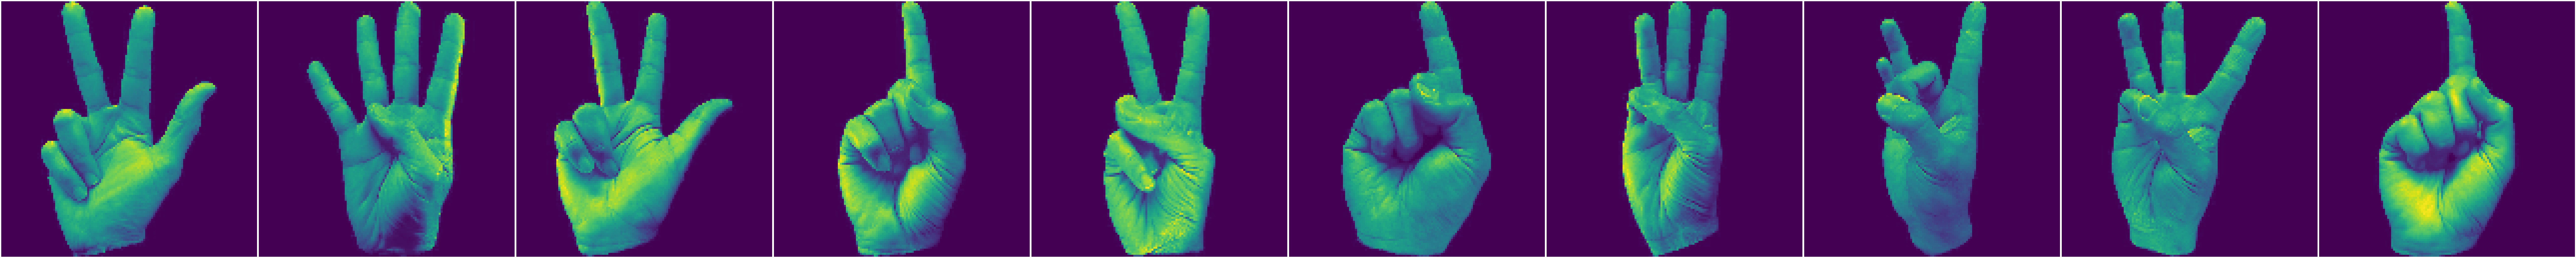

Actual Labels
Three         Four         Three         One         two         One         Six         Eight         Six         One         

In [19]:
#TESTING THE TRAINED MODEL ON SMALL SET OF TEST DATASET

#DEFINE ACTUAL LABEL NAMES
labelNames = {0:'Zero', 1:'One', 2:'two', 3:'Three', 4:'Four', 5:'Five', 6:'Six', 7:'Seven', 8:'Eight', 9:'Nine'}
#PREDICT THE TEST DATA
predictions = model.predict(images, verbose = 0)

print("")
for i, j in enumerate(predictions):
    print(labelNames[np.argmax(j)], end= '         ')
    
plotImages(images)
print('Actual Labels')
for i in labels:
    print(labelNames[np.argmax(i)], end = '         ')
    